In [1]:
import gdal
from livneh import tools as lt
from gdalconst import *
from numpy import ma
import shapefile

In [2]:
# read in CONUS cell index
fl = '/Volumes/data/simulation_conus_rect.tif'
d = gdal.Open(fl,GA_ReadOnly)
cells = np.array(d.GetRasterBand(1).ReadAsArray())

In [3]:
# reshape the cell indexer
print cells.shape
m,n = cells.shape
cells = np.reshape(cells,m*n)

(397, 925)


In [4]:
# read in CONUS forest canopy
fl = '/Volumes/data/conus_forest_canopy/CONUSCartographic_2_8_16/Cartographic/conus_1_16_cart_canopy_align_rect.tif'
d = gdal.Open(fl,GA_ReadOnly)
can = np.array(d.GetRasterBand(1).ReadAsArray()) # grab canopy cover values

In [5]:
# reshape the canopy data
print can.shape
m,n = can.shape
can = np.reshape(can,m*n)

(397, 925)


In [6]:
# read in CONUS terrain slope
fl = '/Volumes/data/conus_srtm/void_filled_90m_conus/conus_1_16_proj_slope_aligned_crop.tif'
d = gdal.Open(fl,GA_ReadOnly)
slope = np.array(d.GetRasterBand(1).ReadAsArray()) # grab canopy cover values

(0.0, 1000.0, 0.0, 400.0)

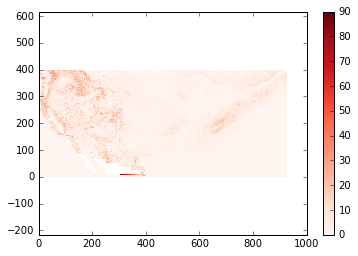

In [7]:
slope = ma.masked_less(slope,0)
slope = ma.masked_greater(slope,90)
plt.pcolormesh(np.flipud(slope),vmin=0,vmax=90,cmap='Reds')
plt.colorbar()
plt.axis('equal')

In [8]:
# reshape the slope data
print slope.shape
m,n = slope.shape
slope = np.reshape(slope,m*n)

(397, 925)


In [9]:
tmp = pd.read_hdf('./budyko_working.hdf')

In [10]:
tmp2 = pd.DataFrame({'idx':cells,'canopy':can,'terrain_slope':slope})

In [11]:
tmp3 = pd.merge(tmp2,tmp,on='idx') #crop the full vic data set and add canopy and slope data

In [12]:
# read in conus close crop cell indexes
fl = '/Volumes/data/simulation_conus_crop.tif'
d = gdal.Open(fl,GA_ReadOnly)
cells = np.array(d.GetRasterBand(1).ReadAsArray())

m,n = cells.shape
cells = np.reshape(cells,m*n)
cells = cells[cells>0] # remove no data values

tmp4 = pd.DataFrame({'idx':cells})

In [13]:
data = pd.merge(tmp4,tmp3,how='inner')

In [14]:
longs,lats,dat = lt.pts2grid(data.frlat,data.frlon,data.meanpeakswe)
dat = ma.masked_less_equal(dat,0)

In [15]:
grey = dat.copy()
grey[dat>=0] = 0.5

In [16]:
dat.shape

(386, 924)

In [17]:
txt1 = 'Analysis: Theodore Barnhart \n(barnhatb@colorado.edu) \n '
txt2 = 'SWE Data: Livneh et al. [2015] \n '
txt3 = 'NLCD Forest Data: Homer et al. [2015] \n '
txt4 = 'SRTM 90 m Topography Data: Farr et al. [2007]'

In [18]:
printfigs = True
pth = './figures/forest_snow/'
figx = 14
figy = 4
axlabft = 14
axticft = 12
cbft = 14
xlab = 'Latitude'
ylab = 'Longitude'
xmin = -130
xmax = -68
ymin = 25
ymax = 50
txtx = -129
txty = 25

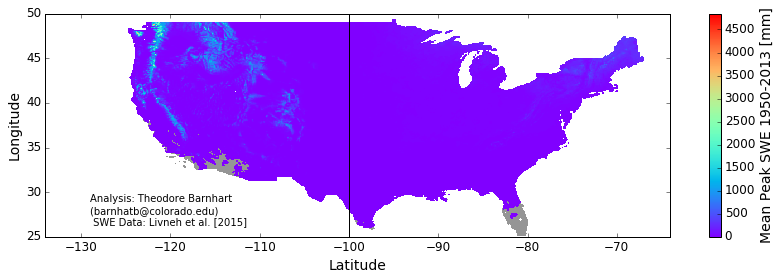

In [19]:
plt.figure(figsize=(figx,figy))
plt.pcolormesh(longs,lats,np.flipud(grey),cmap='Greys',vmin=0,vmax=1)
plt.pcolormesh(longs,lats,np.flipud(dat), cmap='rainbow',vmin=0,vmax=dat.max())
cb = plt.colorbar()
plt.axvline(-100,color='k')
plt.axis('equal')
cb.set_label('Mean Peak SWE 1950-2013 [mm]', fontsize = cbft)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel(xlab,fontsize=axlabft)
plt.ylabel(ylab,fontsize=axlabft)
plt.text(txtx,txty,txt1+txt2)
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(axticft)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(axticft)
cb.ax.tick_params(labelsize=axticft)
if printfigs:
    plt.savefig(pth+'conus_mean_peak_swe.png',dpi=300,bbox_inches='tight')

In [20]:
longs,lats,can = lt.pts2grid(data.frlat,data.frlon,data.canopy)
can = ma.masked_less(can,0)
can = ma.masked_greater(can,100)

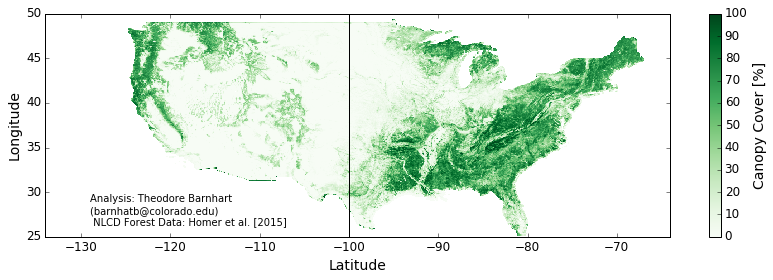

In [21]:
plt.figure(figsize=(figx,figy))
plt.pcolormesh(longs,lats,np.flipud(can),vmin=0,vmax=100,cmap='Greens')
cb = plt.colorbar()
plt.axvline(-100,color='k')
plt.axis('equal')
cb.set_label('Canopy Cover [%]', fontsize = cbft)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel(xlab,fontsize=axlabft)
plt.ylabel(ylab,fontsize=axlabft)
plt.text(txtx,txty,txt1+txt3)
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(axticft)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(axticft)
cb.ax.tick_params(labelsize=axticft)
if printfigs:
    plt.savefig(pth+'conus_canopy_cover.png',dpi=300,bbox_inches='tight')

In [22]:
longs,lats,slope = lt.pts2grid(data.frlat,data.frlon,data.terrain_slope)
slope = ma.masked_less(slope,0)
slope = ma.masked_greater(slope,90)

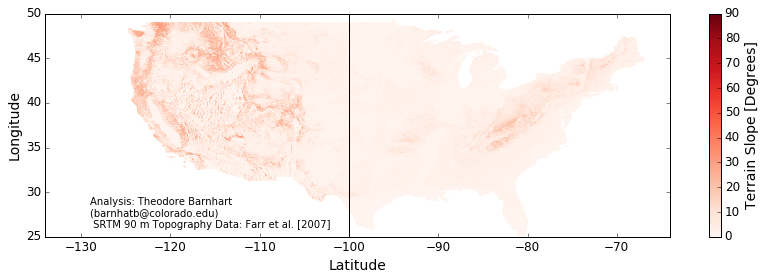

In [23]:
plt.figure(figsize=(figx,figy))
plt.pcolormesh(longs,lats,np.flipud(slope),cmap='Reds',vmin=0,vmax=90)
cb = plt.colorbar()
plt.axvline(-100,color='k')
plt.axis('equal')
cb.set_label('Terrain Slope [Degrees]', fontsize = cbft)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel(xlab,fontsize=axlabft)
plt.ylabel(ylab,fontsize=axlabft)
plt.text(txtx,txty+1,txt1+txt4)
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(axticft)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(axticft)
cb.ax.tick_params(labelsize=axticft)

if printfigs:
    plt.savefig(pth+'conus_slope.png',dpi=300,bbox_inches='tight')

CONUS Total Forest SWE: 43494288.1 km3
Forest SWE 2 degrees and above: 91.0 %
Forest SWE 4 degrees and above: 81.0 %
Forest SWE 6 degrees and above: 74.0 %
Forest SWE 8 degrees and above: 67.0 %
Forest SWE 10 degrees and above: 60.0 %
Forest SWE 12 degrees and above: 53.0 %
Forest SWE 14 degrees and above: 45.0 %
Forest SWE 16 degrees and above: 38.0 %
Forest SWE 18 degrees and above: 30.0 %
Forest SWE 20 degrees and above: 23.0 %
Forest SWE 22 degrees and above: 15.0 %
Forest SWE 24 degrees and above: 9.0 %


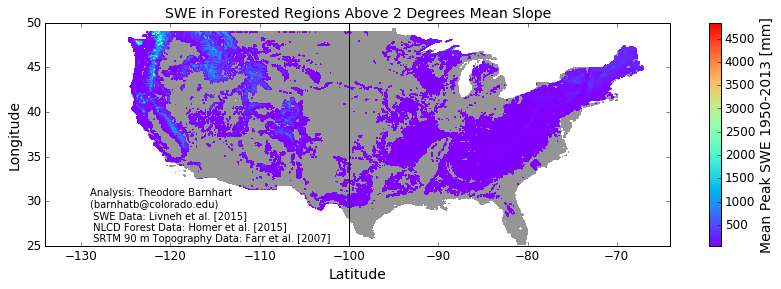

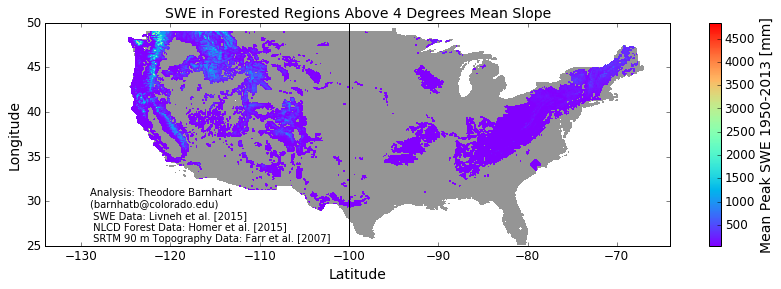

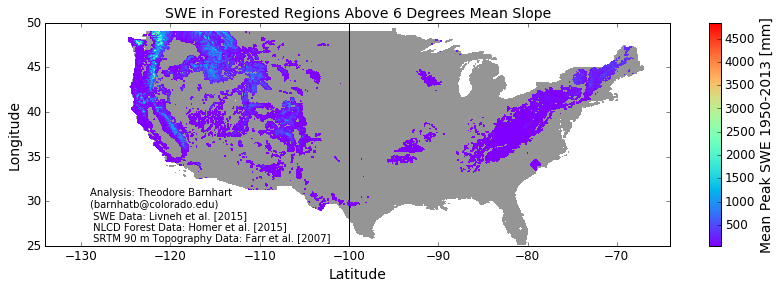

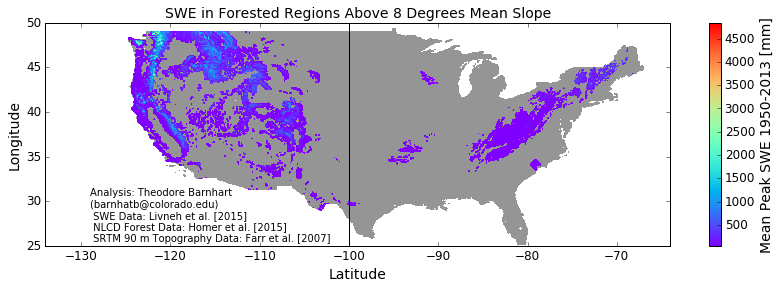

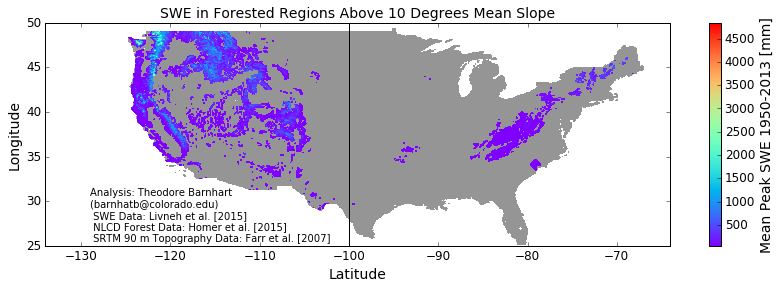

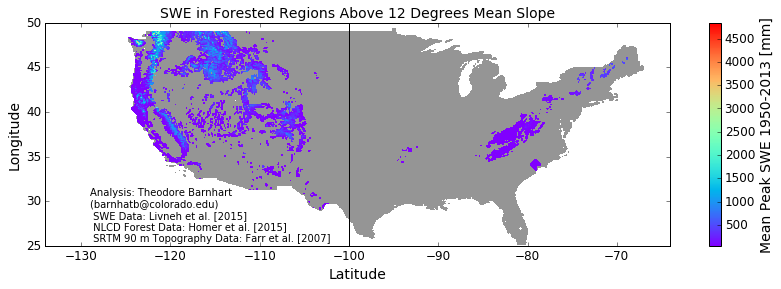

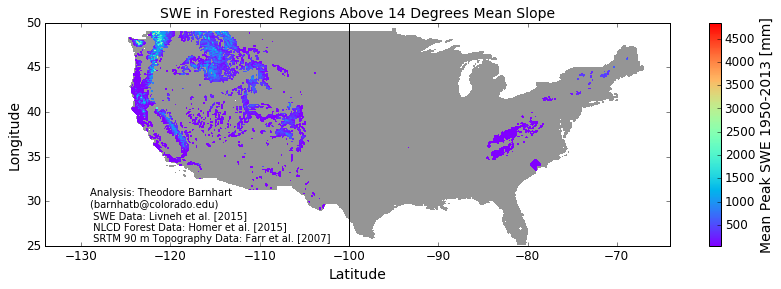

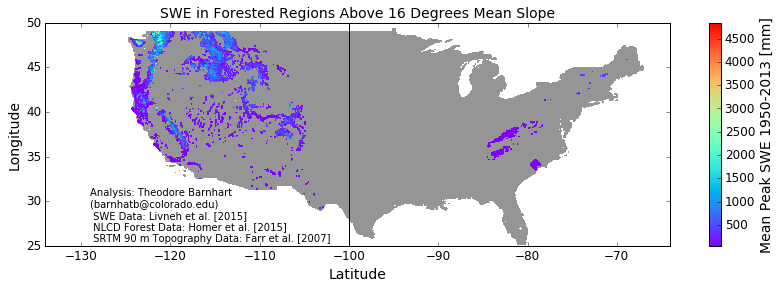

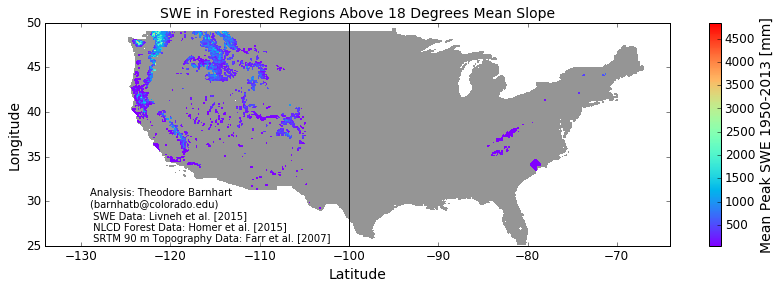

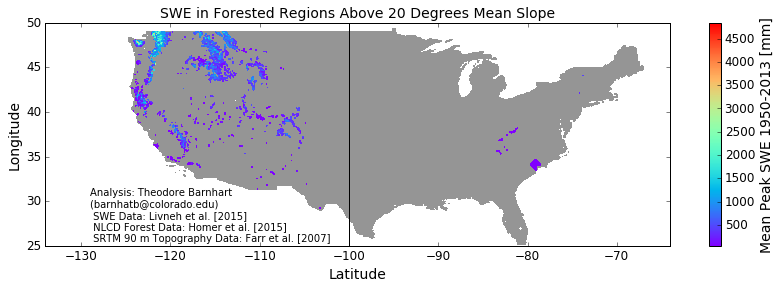

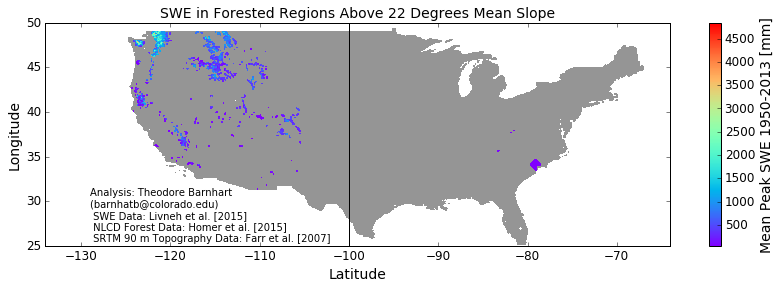

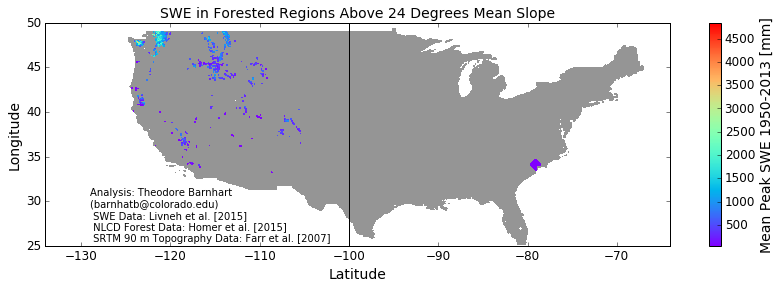

In [24]:
# get foresed area with greater than zero swe
forestpercent = 10

# SWE in the forest
swe = dat.copy()
swe[can<forestpercent] = np.nan
swe[np.isnan(swe)]=-10
swe = ma.masked_less(swe,0)
m,n = swe.shape
tmp = np.reshape(swe,m*n)
tmp = tmp[tmp>0]

area = len(tmp) * (6.*6.)

# compute swe in a variety of scenarios
forestpercent = 10
slopes = np.arange(2,26,2)

# SWE in the forest
swe = dat.copy()
swe[can<forestpercent] = np.nan
forest_swe = np.nansum(swe)
fs = forest_swe.copy()
forest_swe /= 10 # cm
forest_swe /= 100 # m
forest_swe /= 1000 #km

!rm ./figures/forest_snow/CONUSout.txt
!touch ./figures/forest_snow/CONUSout.txt
with open("./figures/forest_snow/CONUSout.txt", "a") as myfile:

    print 'CONUS Total Forest SWE: '+str(round(forest_swe*area,2))+' km3'
    myfile.write('CONUS Total Forest SWE: '+str(round(forest_swe*area,2))+' km3 \n')
    for slp in slopes:

        # SWE in forest and slopes greater than 10 degrees
        swe = dat.copy()
        swe[can<forestpercent] = np.nan # mask non forest
        swe[slope<slp] = np.nan
        slpswe = np.nansum(swe)
        print 'Forest SWE '+str(slp)+' degrees and above: '+str(round(slpswe/fs,2)*100)+' %'
        myfile.write('Forest SWE '+str(slp)+' degrees and above: '+str(round(slpswe/fs,2)*100)+' % \n')

        swe[np.isnan(swe)] = -9999
        swe = ma.masked_less(swe,0)
        plt.figure(figsize=(figx,figy))
        plt.pcolormesh(longs,lats,np.flipud(grey),cmap='Greys',vmin=0,vmax=1)
        plt.pcolormesh(longs,lats,np.flipud(swe), cmap='rainbow',vmin = 50,vmax=dat.max())
        cb = plt.colorbar()
        plt.axvline(-100,color='k')
        plt.axis('equal')
        cb.set_label('Mean Peak SWE 1950-2013 [mm]', fontsize = cbft)
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)
        plt.xlabel(xlab,fontsize=axlabft)
        plt.ylabel(ylab,fontsize=axlabft)
        plt.text(txtx,txty+0.5,txt1+txt2+txt3+txt4)
        plt.title('SWE in Forested Regions Above %s Degrees Mean Slope'%(slp), fontsize=cbft, fontweight='medium')
        ax = plt.gca()
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(axticft)
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(axticft)
        cb.ax.tick_params(labelsize=axticft)

        if printfigs:
            plt.savefig(pth+'conus_forest_swe_slp'+str(slp)+'.png',dpi=300,bbox_inches='tight')



In [25]:
# compute swe in a variety of scenarios
forestpercent = 10

# SWE in the forest
swe = dat.copy()
swe[longs>-100]=np.nan
swe[can<forestpercent] = np.nan
swe[np.isnan(swe)]=-10
swe = ma.masked_less(swe,0)
m,n = swe.shape
tmp = np.reshape(swe,m*n)
tmp = tmp[tmp>0]

area = len(tmp) * (6.*6.)

# compute swe in a variety of scenarios just for the western us

# SWE in the forest
swe = dat.copy()
swe[longs>-100] = np.nan
swe[can<forestpercent] = np.nan
forest_swe = np.nansum(swe) # mm
fs = forest_swe.copy()
forest_swe /= 10 # cm
forest_swe /= 100 # m
forest_swe /= 1000 #km

!rm ./figures/forest_snow/wUSout.txt
!touch ./figures/forest_snow/wUSout.txt
with open("./figures/forest_snow/wUSout.txt", "a") as myfile:
    print 'wUS Total Forest SWE: '+str(round(forest_swe*area,2))+' km3' 
    myfile.write('wUS Total Forest SWE: '+str(round(forest_swe*area,2))+' km3 \n')
        
    #!echo 'wUS Total Forest SWE: '+str(round(forest_swe*area,2))+' km3' >> ./figures/forest_snow/wUSout.txt

    for slp in slopes:

        # SWE in forest and slopes greater than 10 degrees
        swe = dat.copy()
        swe[longs>-100] = np.nan
        swe[can<forestpercent] = np.nan # mask non forest
        swe[slope<slp] = np.nan
        slpswe = np.nansum(swe)
        print 'Forest SWE '+str(slp)+' degrees and above: '+str(round(slpswe/fs,2)*100)+' %'
        myfile.writelines('Forest SWE '+str(slp)+' degrees and above: '+str(round(slpswe/fs,2)*100)+' % \n')

wUS Total Forest SWE: 8627716.02 km3
Forest SWE 2 degrees and above: 100.0 %
Forest SWE 4 degrees and above: 98.0 %
Forest SWE 6 degrees and above: 95.0 %
Forest SWE 8 degrees and above: 90.0 %
Forest SWE 10 degrees and above: 83.0 %
Forest SWE 12 degrees and above: 73.0 %
Forest SWE 14 degrees and above: 64.0 %
Forest SWE 16 degrees and above: 54.0 %
Forest SWE 18 degrees and above: 43.0 %
Forest SWE 20 degrees and above: 32.0 %
Forest SWE 22 degrees and above: 21.0 %
Forest SWE 24 degrees and above: 13.0 %


In [26]:
# make bar charts for conus and the western us
# compute swe in a variety of scenarios
forestpercent = 10
slopes = np.arange(1,38,2)
dslp = 1
swe = []

snow = dat.copy()
snow[can<=forestpercent] = np.nan # mask pixels below forest threshold
    
totforestsnow = np.nansum(snow)

for slp in slopes:
    snow = dat.copy()
    snow[can<=forestpercent] = np.nan # mask pixels below forest threshold
    
    lowslp = slp-dslp
    maxslp = slp+dslp
    snow[slope<lowslp] = np.nan # mask slopes below low threshold 
    snow[slope>=maxslp] = np.nan # mask slopes greater than or equal to max threshold
    swe.append(np.nansum(snow)/totforestsnow)


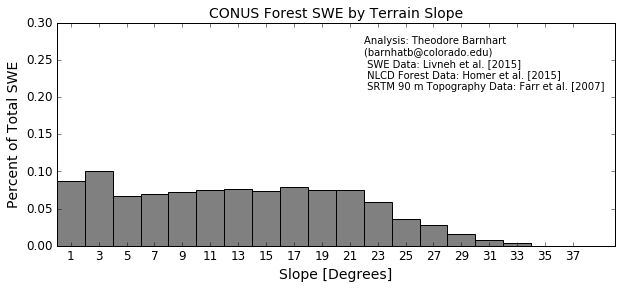

In [27]:
plt.figure(figsize=(10,4))
plt.bar(slopes-1,swe,width=2*dslp,facecolor='0.5')
plt.xticks(slopes, fontsize = axticft);
plt.xlabel('Slope [Degrees]',fontsize=axlabft);
plt.ylabel('Percent of Total SWE', fontsize=axlabft)
plt.title('CONUS Forest SWE by Terrain Slope',fontsize=axlabft)
plt.ylim(0,0.3)
plt.text(22,0.21,txt1+txt2+txt3+txt4)
ax = plt.gca()
for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(axticft)

if printfigs:
        plt.savefig(pth+'conus_forest_snow_bars.png',dpi=300,bbox_inches='tight')

In [28]:
# make bar charts for conus and the western us
# compute swe in a variety of scenarios
forestpercent = 10
slopes = np.arange(1,38,2)
dslp = 1
swe = []

snow = dat.copy()
snow[can<=forestpercent] = np.nan # mask pixels below forest threshold
snow[longs>-100] = np.nan # mask the area east of -100    

totforestsnow = np.nansum(snow)

for slp in slopes:
    snow = dat.copy()
    snow[can<=forestpercent] = np.nan # mask pixels below forest threshold
    snow[longs>-100] = np.nan # mask the area east of -100
    
    lowslp = slp-dslp
    maxslp = slp+dslp
    snow[slope<lowslp] = np.nan # mask slopes below low threshold 
    snow[slope>=maxslp] = np.nan # mask slopes greater than or equal to max threshold
    swe.append(np.nansum(snow)/totforestsnow)


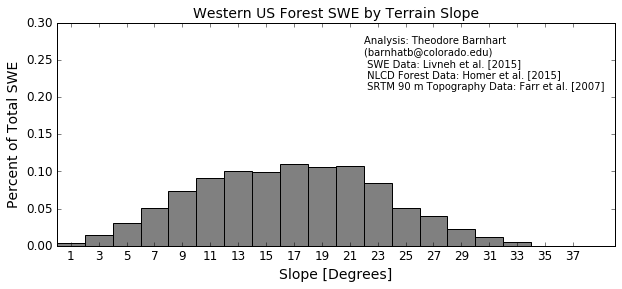

In [29]:
plt.figure(figsize=(10,4))
plt.bar(slopes-1,swe,width=2*dslp,facecolor='0.5')
plt.xticks(slopes, fontsize = axticft);
plt.xlabel('Slope [Degrees]',fontsize=axlabft);
plt.ylabel('Percent of Total SWE', fontsize=axlabft)
plt.title('Western US Forest SWE by Terrain Slope',fontsize=axlabft)
plt.ylim(0,0.3)
plt.text(22,0.21,txt1+txt2+txt3+txt4)
ax = plt.gca()
for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(axticft)

if printfigs:
        plt.savefig(pth+'wUS_forest_snow_bars.png',dpi=300,bbox_inches='tight')

In [30]:
# compute SWE above a given slope CONUS

forestpercent = 10
slopes = np.arange(0,40,2)
dslp = 2
swe = []

snow = dat.copy()
snow[can<=forestpercent] = np.nan # mask pixels below forest threshold

totforestsnow = np.nansum(snow)

for slp in slopes:
    snow = dat.copy()
    snow[can<=forestpercent] = np.nan # mask pixels below forest threshold
    
    snow[slope<slp] = np.nan # mask slopes below low threshold 
    swe.append(np.nansum(snow)/totforestsnow)

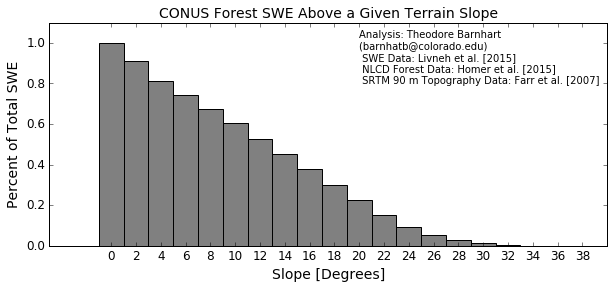

In [31]:
plt.figure(figsize=(10,4))
plt.bar(slopes-1,swe,width=dslp,facecolor='0.5')
plt.xticks(slopes, fontsize = axticft);
plt.xlabel('Slope [Degrees]',fontsize=axlabft);
plt.ylabel('Percent of Total SWE', fontsize=axlabft)
plt.title('CONUS Forest SWE Above a Given Terrain Slope',fontsize=axlabft)
plt.ylim(0,1.1)
plt.text(20,0.8,txt1+txt2+txt3+txt4)
ax = plt.gca()
for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(axticft)

if printfigs:
        plt.savefig(pth+'conus_forest_snow_above_bars.png',dpi=300,bbox_inches='tight')

In [32]:
# compute SWE above a given slope wUS
forestpercent = 10
slopes = np.arange(0,40,2)
dslp = 2
swe = []

snow = dat.copy()
snow[can<=forestpercent] = np.nan # mask pixels below forest threshold
snow[longs>-100] = np.nan # mask the area east of -100    

totforestsnow = np.nansum(snow)

for slp in slopes:
    snow = dat.copy()
    snow[can<=forestpercent] = np.nan # mask pixels below forest threshold
    snow[longs>-100] = np.nan # mask the area east of -100
    
    snow[slope<slp] = np.nan # mask slopes below low threshold 
    swe.append(np.nansum(snow)/totforestsnow)

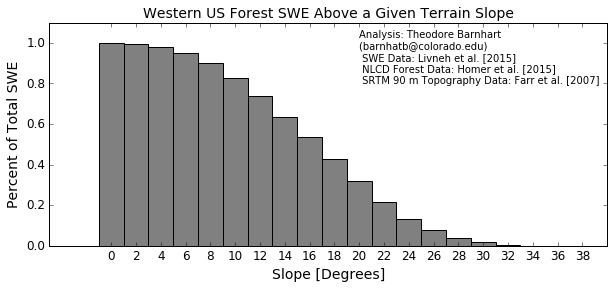

In [33]:
plt.figure(figsize=(10,4))
plt.bar(slopes-1,swe,width=dslp,facecolor='0.5')
plt.xticks(slopes, fontsize = axticft);
plt.xlabel('Slope [Degrees]',fontsize=axlabft);
plt.ylabel('Percent of Total SWE', fontsize=axlabft)
plt.title('Western US Forest SWE Above a Given Terrain Slope',fontsize=axlabft)
plt.ylim(0,1.1)
plt.text(20,0.8,txt1+txt2+txt3+txt4)
ax = plt.gca()
for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(axticft)

if printfigs:
        plt.savefig(pth+'wUS_forest_snow_above_bars.png',dpi=300,bbox_inches='tight')

In [34]:
data.meanpeakswe.max()

4844.5120984126997

In [35]:
dat.max()

4844.5120984126997